In [1]:
!pip install "camelot-py[cv]"
!pip install xlsxwriter

In [2]:
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.15).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
!wget 'http://www.kepcorp.com/annualreport2018/pdf/keppel-corporation-limited-annual-report-2018.pdf'

--2022-04-20 11:25:48--  http://www.kepcorp.com/annualreport2018/pdf/keppel-corporation-limited-annual-report-2018.pdf
Resolving www.kepcorp.com (www.kepcorp.com)... 120.50.42.169
Connecting to www.kepcorp.com (www.kepcorp.com)|120.50.42.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8942409 (8.5M) [application/pdf]
Saving to: ‘keppel-corporation-limited-annual-report-2018.pdf’

keppel-corporation- 100%[===================>]   8.53M  1.16MB/s    in 11s     

2022-04-20 11:25:59 (818 KB/s) - ‘keppel-corporation-limited-annual-report-2018.pdf’ saved [8942409/8942409]



In [4]:
import camelot
table=camelot.read_pdf('/content/keppel-corporation-limited-annual-report-2018.pdf', flavor='stream', pages='69')

In [5]:
len(table)

2

In [6]:
table[1].parsing_report

{'accuracy': 98.97, 'order': 2, 'page': 69, 'whitespace': 13.27}

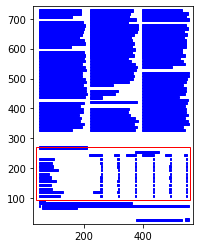

In [7]:
import matplotlib.pyplot as plt
camelot.plot(table[1], kind='contour')
plt.show()

In [8]:
df=table[1].df
df

,0,1,2,3,4,5,6
0,Board and Committee Meetings and Attendance,,,,,,
1,,,,,Board Committee Meetings,,
2,,Board Meetings,Audit,Nomination,Remuneration,Safety,Risk
3,Lee Boon Yang,11,–,3,4,4,–
4,Loh Chin Hua,11,–,–,–,4,–
5,Tow Heng Tan,8,–,3,2,–,4
6,Alvin Yeo Khirn Hai,9,5,1,–,–,–
7,Tan Ek Kia,9,5,–,–,4,4
8,Danny Teoh,10,5,–,4,–,4
9,Tan Puay Chiang1,10,–,3,–,4,4


In [9]:
import pandas as pd

writer = pd.ExcelWriter('output_excel.xlsx', engine='xlsxwriter')
df.to_excel(writer, header=False, index=False)#, sheet_name='welcome', index=False)
writer.save()